In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [2]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.shape

(5110, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
pd.set_option('display.float_format',lambda x : '%.3f' % x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.000,36517.829,21161.722,67.000,17741.250,36932.000,54682.000,72940.000
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
hypertension,5110.000,0.097,0.297,0.000,0.000,0.000,0.000,1.000
heart_disease,5110.000,0.054,0.226,0.000,0.000,0.000,0.000,1.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,4909.000,28.893,7.854,10.300,23.500,28.100,33.100,97.600
stroke,5110.000,0.049,0.215,0.000,0.000,0.000,0.000,1.000


In [7]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In the above code, we found out that unknown takes up about 30%(second highest) value in the smoking status category.Thus, we choose to leave it as another category since dropping this might reduce the sample data size and cause loss of data.If we impute it with mode/mean it might introduce bias in our dataset .

# Handle categorical values


In [8]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
data['gender'] = data['gender'].replace('Other',"Female")

Initially,there is 1 category values named "others".Thus,here we replace it with the mode of the gender which is Female category.

In [10]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols: 
    le.fit(data[col])
    data[col] = le.transform(data[col])

The code above are to transform all the categorical column into numerical column for better analysing.

In [12]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.000,0,1,1,2,1,228.690,36.600,1,1
1,51676,0,61.000,0,0,1,3,0,202.210,NaN,2,1
2,31112,1,80.000,0,1,1,2,0,105.920,32.500,2,1
3,60182,0,49.000,0,0,1,2,1,171.230,34.400,3,1
4,1665,0,79.000,1,0,1,3,0,174.120,24.000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.000,1,0,1,2,1,83.750,NaN,2,0
5106,44873,0,81.000,0,0,1,3,1,125.200,40.000,2,0
5107,19723,0,35.000,0,0,1,3,0,82.990,30.600,2,0
5108,37544,1,51.000,0,0,1,2,0,166.290,25.600,1,0


# Handle Null value

In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The two code above is to check whether the dataset have a null values or duplicate data.The results shows that there are 201 null values in bmi column and no duplicate data in dataset.

In [15]:
mean_bmi = data['bmi'].mean()

data['bmi'].fillna(value=mean_bmi, inplace=True)

In [16]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.000,0,1,1,2,1,228.690,36.600,1,1
1,51676,0,61.000,0,0,1,3,0,202.210,28.893,2,1
2,31112,1,80.000,0,1,1,2,0,105.920,32.500,2,1
3,60182,0,49.000,0,0,1,2,1,171.230,34.400,3,1
4,1665,0,79.000,1,0,1,3,0,174.120,24.000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.000,1,0,1,2,1,83.750,28.893,2,0
5106,44873,0,81.000,0,0,1,3,1,125.200,40.000,2,0
5107,19723,0,35.000,0,0,1,3,0,82.990,30.600,2,0
5108,37544,1,51.000,0,0,1,2,0,166.290,25.600,1,0


Above, we have done data imputation where we we imputed the data by replace the null values in bmi column with the mean of the bmi column itself to fill up the missing data.This is beacuse we don't want to loss a significant data.

In [17]:
data["gender"].value_counts()

0    2995
1    2115
Name: gender, dtype: int64

# EDA

In [18]:
import seaborn as sns

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'ever_married'}>],
       [<Axes: title={'center': 'work_type'}>,
        <Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'smoking_status'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

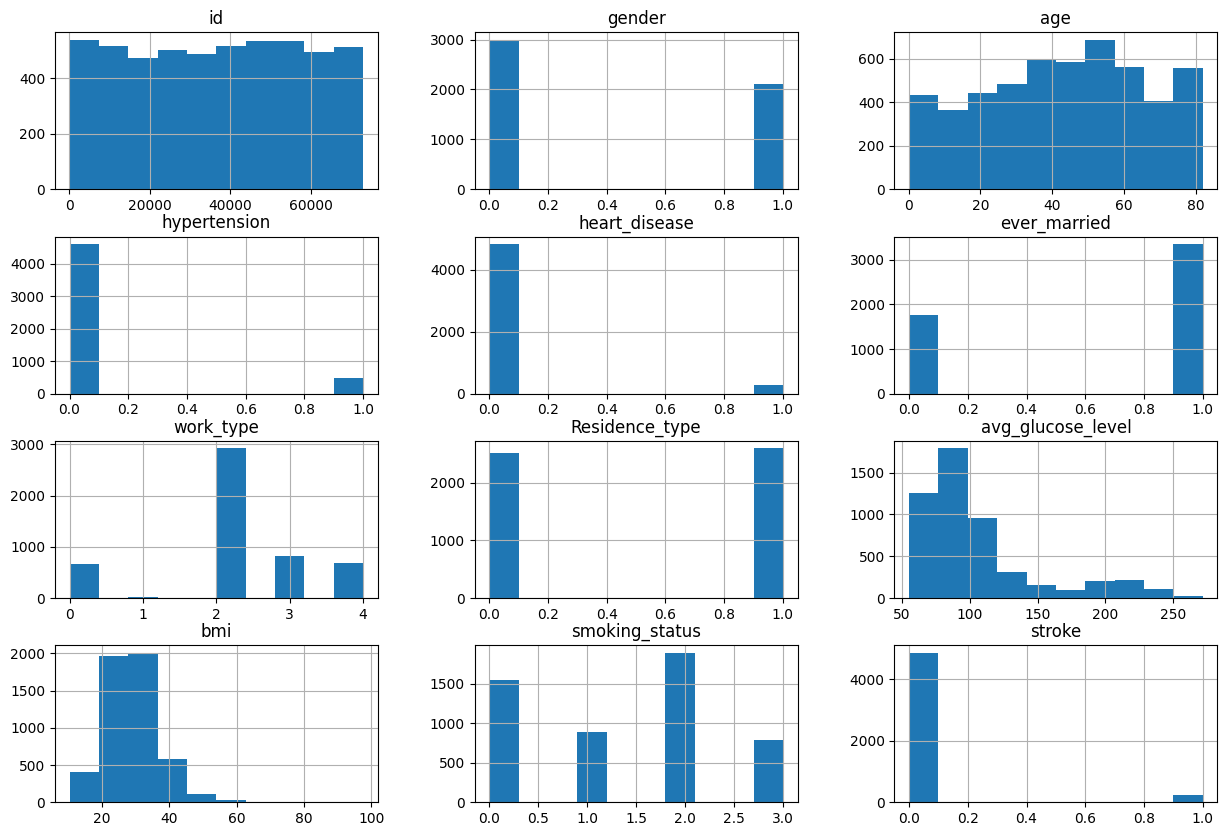

In [19]:
data.hist(figsize=(15,10))

we made a graph for all variables to check the general overview and pattern .

In [20]:
class_counts = data['stroke'].value_counts()

print('Class distribution:')
print(class_counts)

Class distribution:
0    4861
1     249
Name: stroke, dtype: int64


0 here represents the population with "no stroke" category while 1 represents the population that has "stroke"

In [21]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f70e30265f0>,
 [Text(0, 0, 'No Stroke'), Text(1, 0, 'Stroke')])

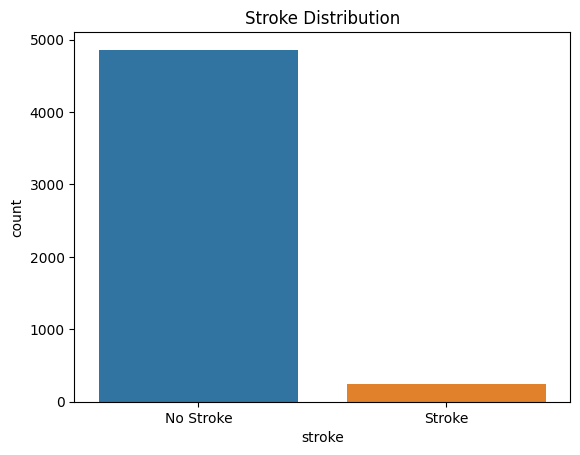

In [22]:
plt.title('Stroke Distribution')
sns.countplot(x=data['stroke'])
plt.xticks(ticks=[0,1],labels=["No Stroke", "Stroke"])


This bar chart shows a significant difference between No stroke category and stroke .Thus, we will scale this using SMOTE technique during modelling

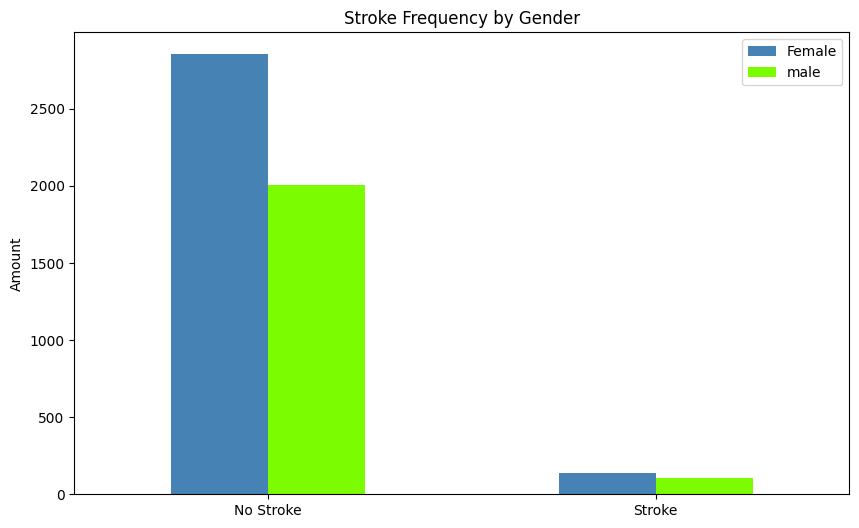

In [23]:
pd.crosstab(data.stroke, data.gender).plot(kind='bar',
                                       figsize=(10,6), 
                                       color=["steelblue","lawngreen"],
                                       rot=0)

plt.title("Stroke Frequency by Gender")
plt.xticks(ticks=[0,1],labels=["No Stroke", "Stroke"])
plt.xlabel(None)
plt.ylabel("Amount");

plt.legend(["Female", "male"]);

from the barchart, we can say that Majority of the population falls under  "No stroke" category .However, the population of female(0) is higher than male(1) in this category.

For the "stroke" category, we can say that Female(0) makes up a slightly higher amount than males(1)

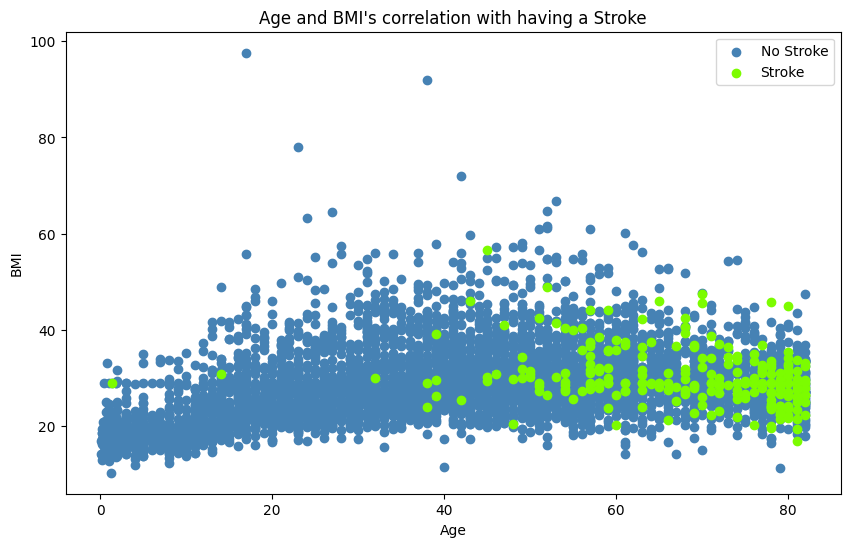

In [24]:
plt.figure(figsize=(10,6))

# Ages and BMI for people who haven't had a stroke
plt.scatter(data.age[data.stroke==0], 
            data.bmi[data.stroke==0],
            c="steelblue")

# Ages and BMI for people who have had a stroke
plt.scatter(data.age[data.stroke==1], 
            data.bmi[data.stroke==1],
            c="lawngreen")

plt.title("Age and BMI's correlation with having a Stroke")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Stroke", "Stroke"]);


in the above , scatterplot we can observe that the higher tha age, the possibility to get stroke regardless of BMI.For BMI, the population of people to get stroke is higher within the BMI range of 20 to 40.

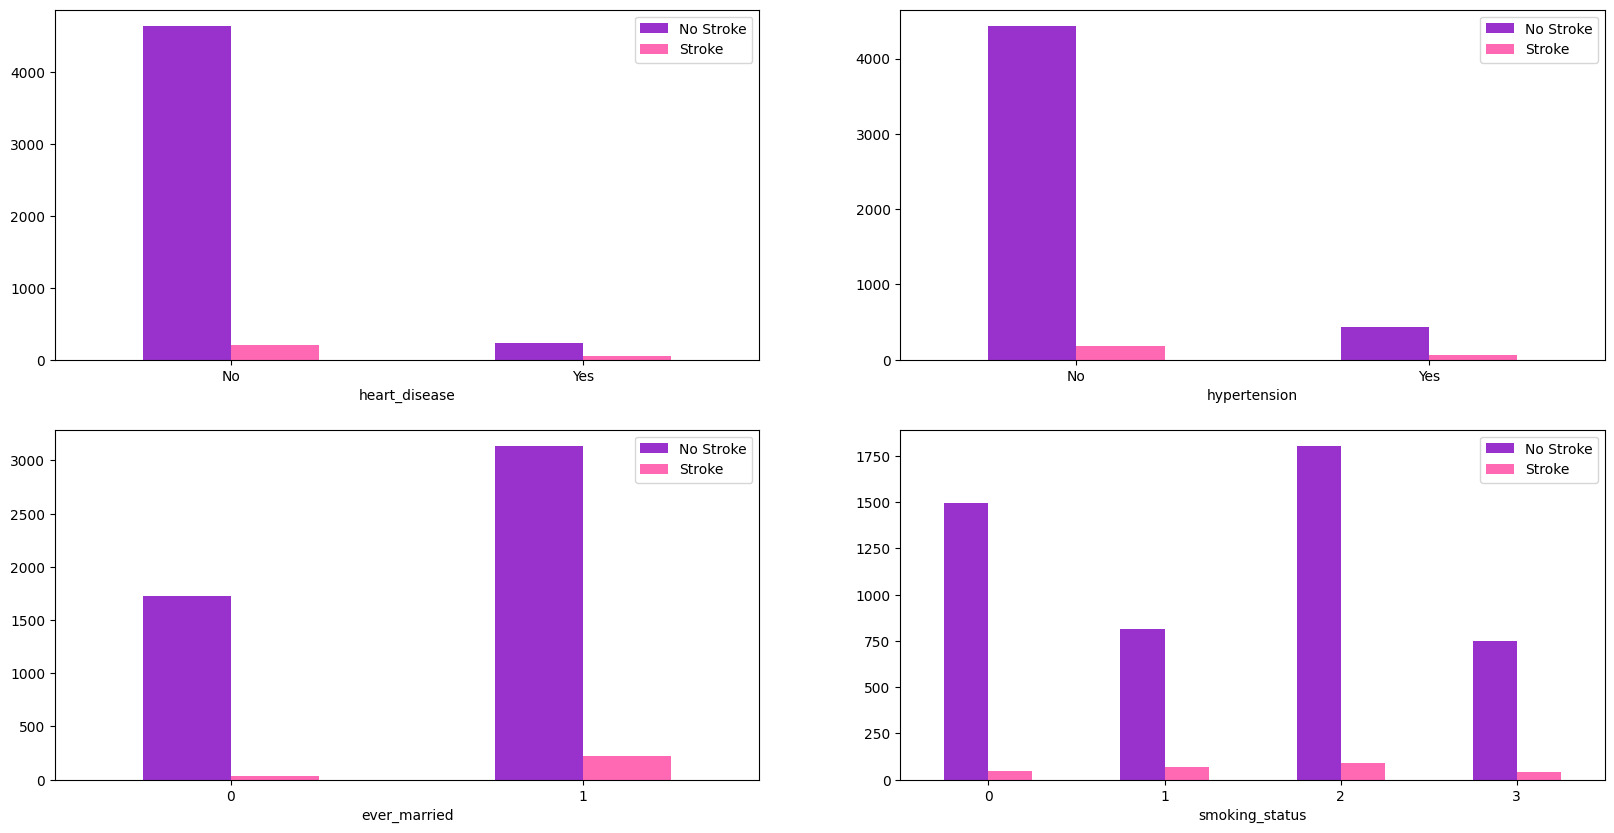

In [25]:
ct1 = pd.crosstab(data.heart_disease,data.stroke)
ct2 = pd.crosstab(data.hypertension,data.stroke)
ct3 = pd.crosstab(data.ever_married,data.stroke)
ct4 = pd.crosstab(data.smoking_status,data.stroke)

colors = ["darkorchid","hotpink"]

# Setting up the figure and different axes on the figure
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2, 
                                          figsize=(20,10))

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);

# Setting x labels for heart_disease and hypertension
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])

ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke']);

Generally, higher population falls under "No stroke" category compared to "stroke"

 **First barchart (Upper left)**


*   Overall,higher percentages of population of "No stroke" falls under people who has'nt gotten a heart disease complication before.
*   For **stroke** category,higher percentages of population falls under people who has'nt gotten a heart disease complication before.


**Second barchart (Upper right)**


*   Overall,Higher amount of population of "No stroke" falls under people who has not gotten hypertension
*   For **stroke** category,Higher amount of population falls under people who has not gotten hypertension


**Third barchart (Lower left)**


*   Overall,Higher amount of population of "NO stroke" falls under people who has married(1).
*   For **stroke** category,Higher amount of population falls under people who has married(1).


**Fourth barchart (Lower right)**


*   Overall,Higher amount of population of "no stroke" falls under people who has never smoked before(2)
*  For **stroke** category,Higher amount of population falls under people who has never smoked before(2) followed by the Unknown(1).Thus, we make a good decision to not drop the unknown column.


#CORRELATION

In [26]:
data = data.drop('id', axis=1)

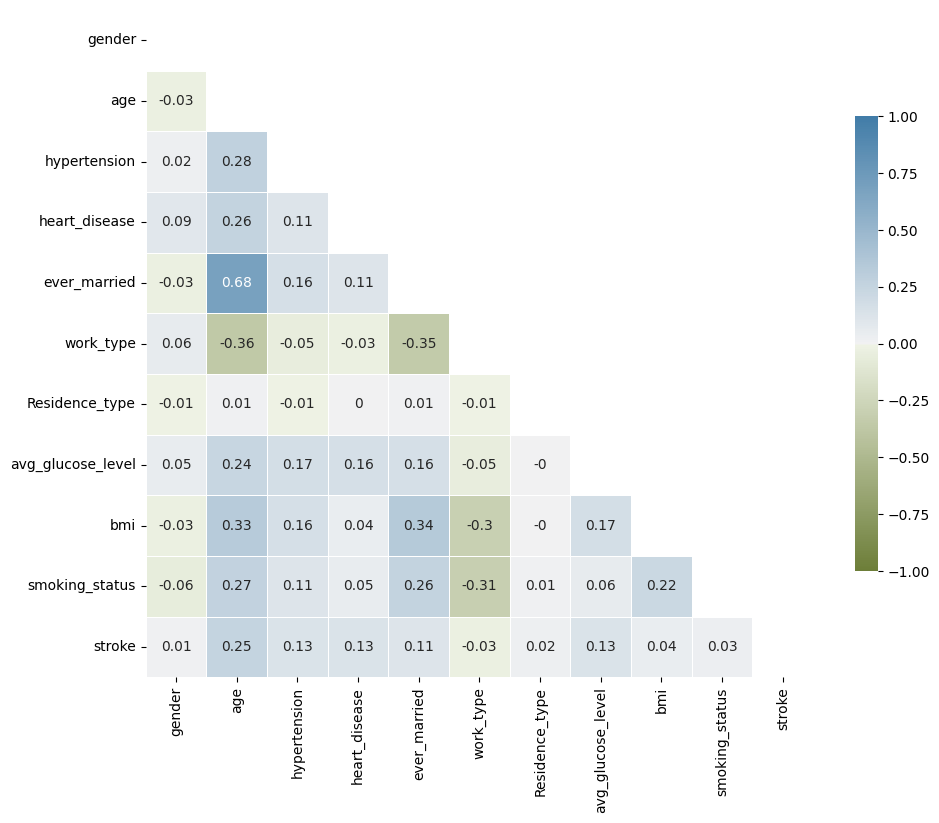

In [27]:
# Generate and visualize the correlation matrix
corr = data.corr().round(2)

# upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# figure size
f, ax = plt.subplots(figsize=(10, 10))

# Setting colour
cmap = sns.diverging_palette(100, 240, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

#Checking the outliers

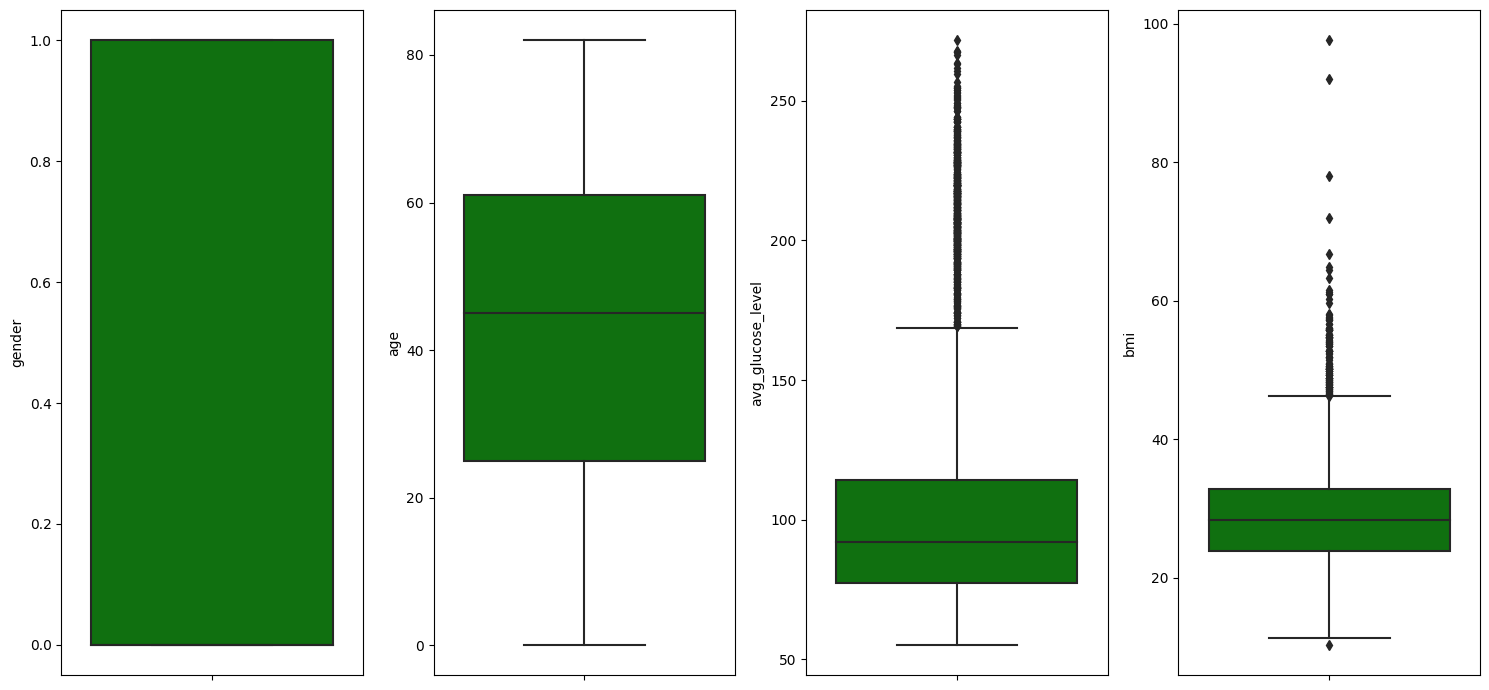

In [28]:
featuresNum = ['gender', 'age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=data[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

Based on the boxplot, we did not remove the outliers because the outliers is possible and we do not want to loss hidden data if we drop it.

# **MODELLING**

In [29]:
X = data.drop(['stroke'], axis = 1) 
y = data['stroke'] 

**SMOTE**


SMOTE is a technique used to address imbalance of a class because of number of sample in one class is much smaller than the other class. SMOTE algorithm will generate synthetic data points that are slightly different from the original data points in the minority class.

In [30]:
from imblearn.over_sampling import SMOTE

smote_data = SMOTE() #object to perform the oversampling
X_smote_data , y_smote_data = smote_data.fit_resample(X,y)
#contain the oversampled data
# can used for training models that perform better when the classes are balanced.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote_data, y_smote_data, test_size = 0.30 , random_state = 42)
#split the data into train and test sets

In [32]:
#used to standardize the features of a dataset
#transforming them to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #perform the feature scaling.
X_train = ss.fit_transform(X_train) #computes the mean and standard deviation
X_test = ss.transform(X_test)
# avoiding dominance of certain features due to their larger ranges.

**Logistic Regression**


In [33]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_train, y_train)
y_pred = log_r.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report) 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1457
           1       0.79      0.81      0.80      1460

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917



In [35]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7970381530824269

In [36]:
cm = confusion_matrix(y_test, y_pred)
predicted_probab_log = log_r.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

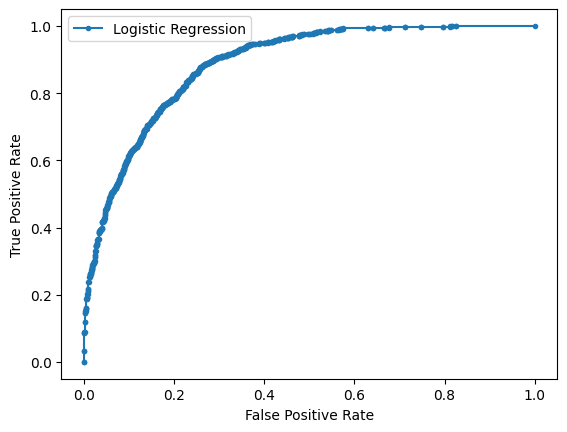

In [37]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [38]:
log_model = LogisticRegression(max_iter=1000).fit(X, y)
y_pred = log_model.predict(X)

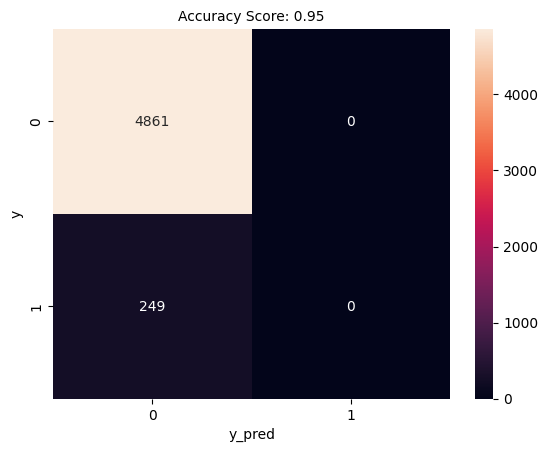

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show(block=True)

plot_confusion_matrix(y, y_pred)

In [40]:
print(classification_report(y, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       1.00      0.00      0.00       249

    accuracy                           0.95      5110
   macro avg       0.98      0.50      0.49      5110
weighted avg       0.95      0.95      0.93      5110



In [41]:
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.8443930009278009

**Hold-out**


Hold-out validation is used to assess the performance of model. It involves splitting the dataset into training set and a validation set. The training set is used to train your machine learning model, and the validation set is used to evaluate its performance.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=17)

In [43]:
smote_over_sampling = SMOTE(random_state=1)
x_train_resampled, y_train_resampled = smote_over_sampling.fit_resample(X_train, y_train)

In [44]:
log_model = LogisticRegression(max_iter = 1000).fit(x_train_resampled, y_train_resampled)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.86       972
           1       0.12      0.62      0.21        50

    accuracy                           0.77      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.77      0.83      1022



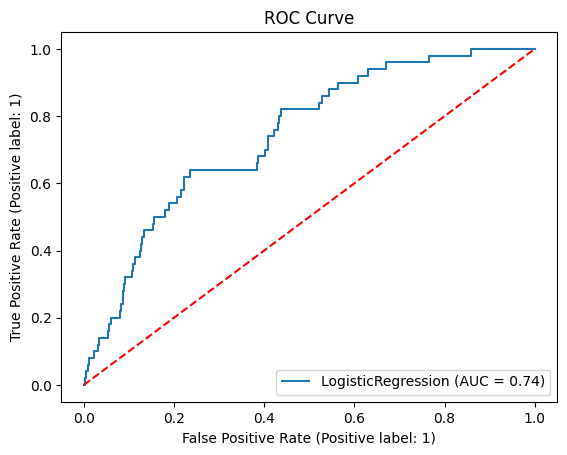

0.7434979423868313

In [45]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(log_model, X_test, y_test)

plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()
roc_auc_score(y_test, y_prob)

**5-Fold Cross Validation**


5-Fold Cross Validation is used to evaluate the performance of a machine learning model by dividing the dataset into five equal-sized subsets, or folds.The model is trained on four of the folds, and the remaining fold is used as the validation set. It is repeated 5 times, each time using different part as the validation set. It helps to reduce the impact of randomness in the data splitting process.

In [46]:
from sklearn.model_selection import train_test_split, cross_validate
log_model = LogisticRegression(max_iter = 1000).fit(x_train_resampled, y_train_resampled)

cv_results = cross_validate(log_model, x_train_resampled, y_train_resampled, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [47]:
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.81010803527885
test_f1:  0.8135934916541447
test_roc_auc:  0.8924701451822605


**KNeighborsClassifier**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X, y)
y_pred = knn_model.predict(X)
y_prob = knn_model.predict_proba(X)[:, 1]
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4861
           1       0.53      0.10      0.16       249

    accuracy                           0.95      5110
   macro avg       0.74      0.55      0.57      5110
weighted avg       0.94      0.95      0.94      5110



In [49]:
### Cross Validation
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.9418786692759296
test_f1:  0.00625
test_roc_auc:  0.6702889513893691


**Hyperparameters**

In [50]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [51]:
knn_params = {"n_neighbors": range(2, 50)}

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [53]:
knn_params = {"n_neighbors": range(2, 50)}

In [54]:
knn_gs_best.best_params_

{'n_neighbors': 14}

In [55]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

In [56]:
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

test_accuracy:  0.9418786692759296
test_f1:  0.00625
test_roc_auc:  0.6702889513893691


**Model Evaluation**

7 different classification models are used for model evaluation.

Model is trained on a training set and the trained model is used to predict labels for the test set. Model performance is then evaluated based on precision, recall, F1-score, and support for each class.

We used ROC AUC to measure the overall performance of a binary classification model, taking into account both the true positive rate and the false positive rate. Cross validation is used to evaluate the model. COnfusion matrix is also used to show how many predictions are correct and incorrect by representing it in a matrix form.


In [57]:
results = pd.DataFrame(columns = ['KNN', 'SVC', 'LR', 'RF', 'XGB', 'LGBM','AdaBoost'], index = range(5))

**KNN**

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.13      0.60      0.21        50

    accuracy                           0.78      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.78      0.84      1022

ROC AUC score: 0.758

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.947
precision: 0.83
recall: 0.98
f1: 0.9


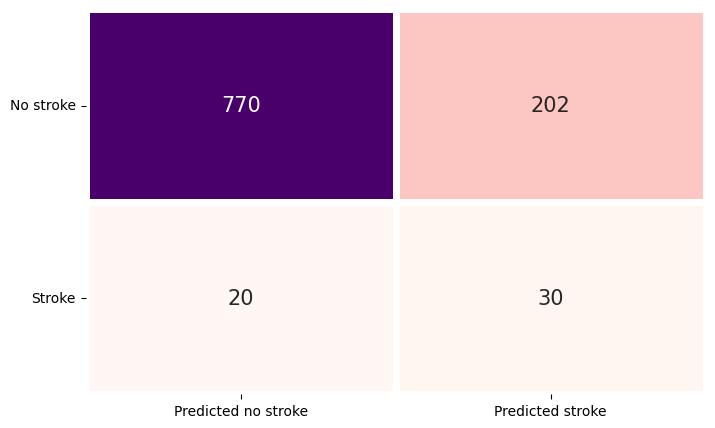

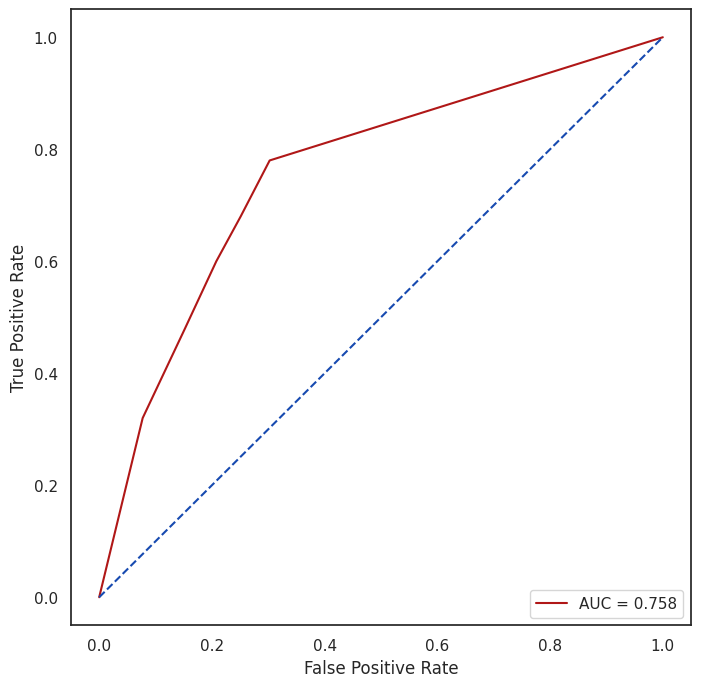

In [58]:
knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)
knn_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(knn, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(knn, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(knn, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(knn, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")

results.iloc[4, 1] = round(cross_val_score(knn, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(knn_cm, cmap = 'RdPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**SVC**

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       972
           1       0.12      0.76      0.20        50

    accuracy                           0.71      1022
   macro avg       0.55      0.73      0.51      1022
weighted avg       0.94      0.71      0.79      1022

ROC AUC score: 0.844

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.851
precision: 0.74
recall: 0.83
f1: 0.78


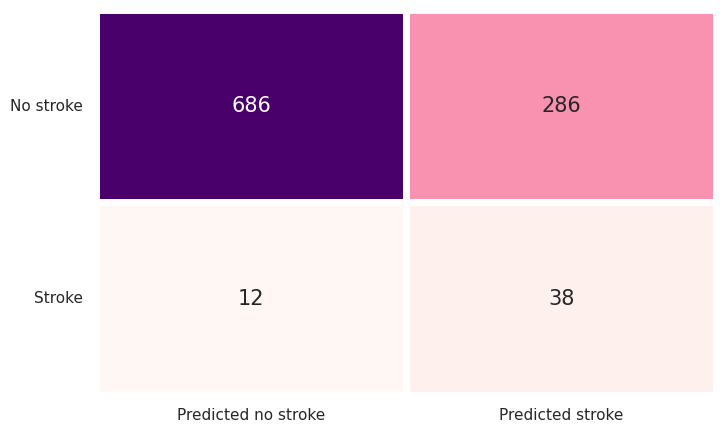

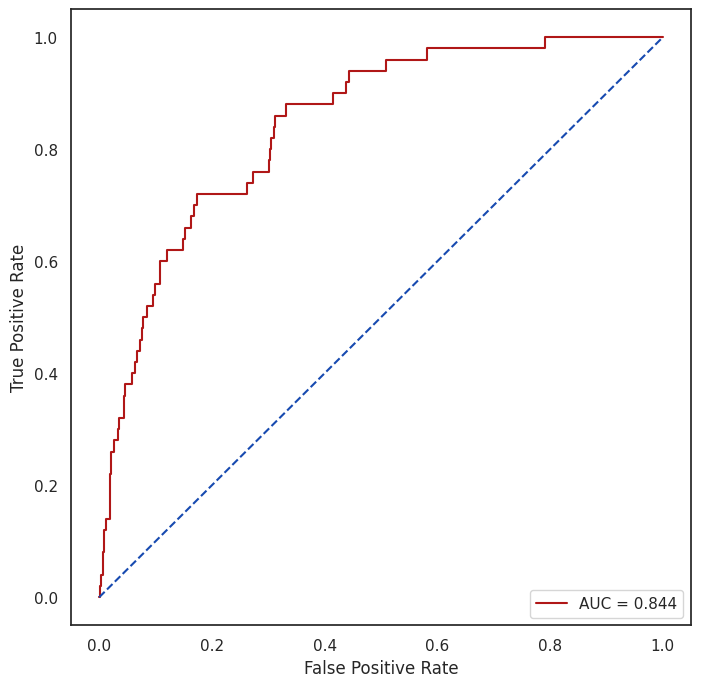

In [59]:
from sklearn.svm import SVC
svc = SVC(random_state = 22, probability = True)
svc.fit(x_train_resampled, y_train_resampled)
y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_prob), 3)
svc_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")


results.iloc[4, 0] = round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)


# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(svc_cm, cmap = 'RdPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},  yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.66      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.52      1022
weighted avg       0.94      0.74      0.82      1022

ROC AUC score: 0.789

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.925
precision: 0.78
recall: 0.92
f1: 0.84


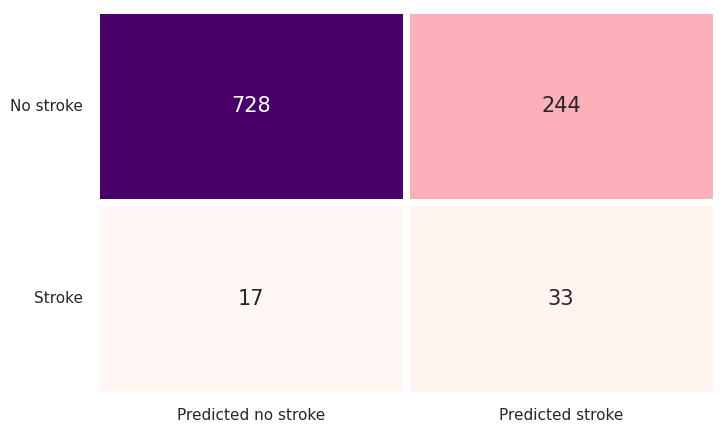

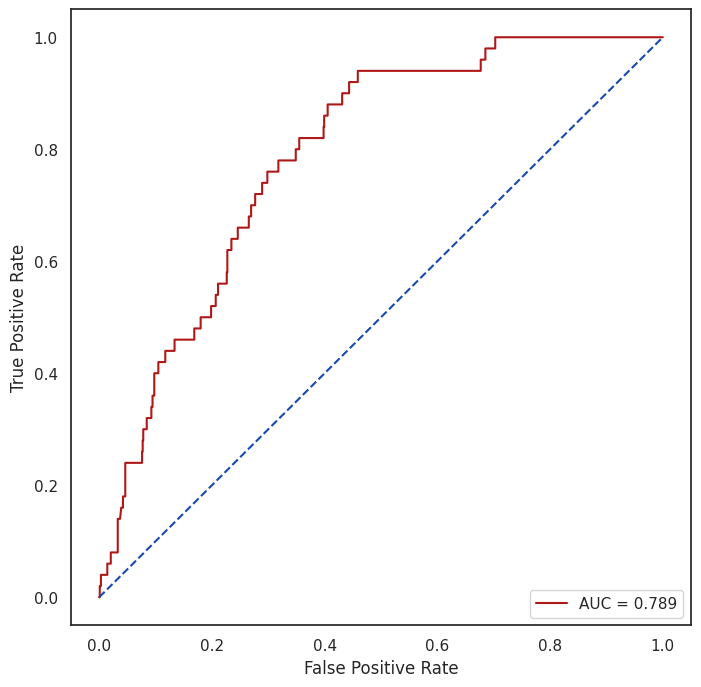

,feature,importance
1,age,0.581163
5,work_type,0.094311
7,avg_glucose_level,0.090343
8,bmi,0.073650
0,gender,0.049900
6,Residence_type,0.045490
9,smoking_status,0.033954
4,ever_married,0.013887
3,heart_disease,0.009785
2,hypertension,0.007518


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
rf.fit(x_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")
results.iloc[4, 3] = round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)


# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'RdPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = x_train_resampled.columns.to_list()[i]
f_imp2['importance'] = rf.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:12].style.background_gradient(cmap = 'RdPu')



**Logistic Regression**

              precision    recall  f1-score   support

           0       0.98      0.78      0.86       972
           1       0.12      0.62      0.21        50

    accuracy                           0.77      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.77      0.83      1022

ROC AUC score: 0.743

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.892
precision: 0.8
recall: 0.83
f1: 0.81


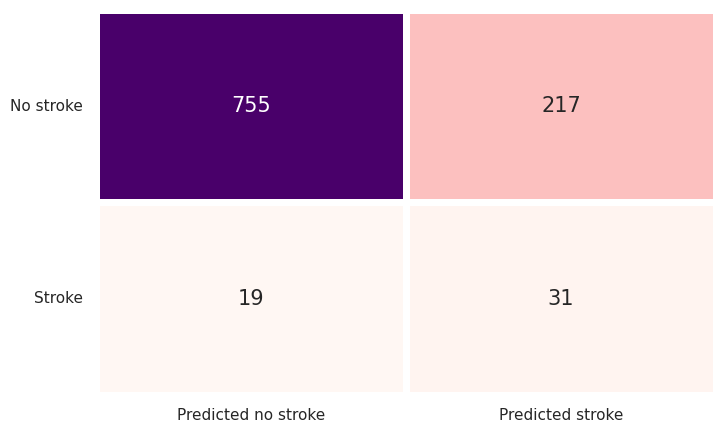

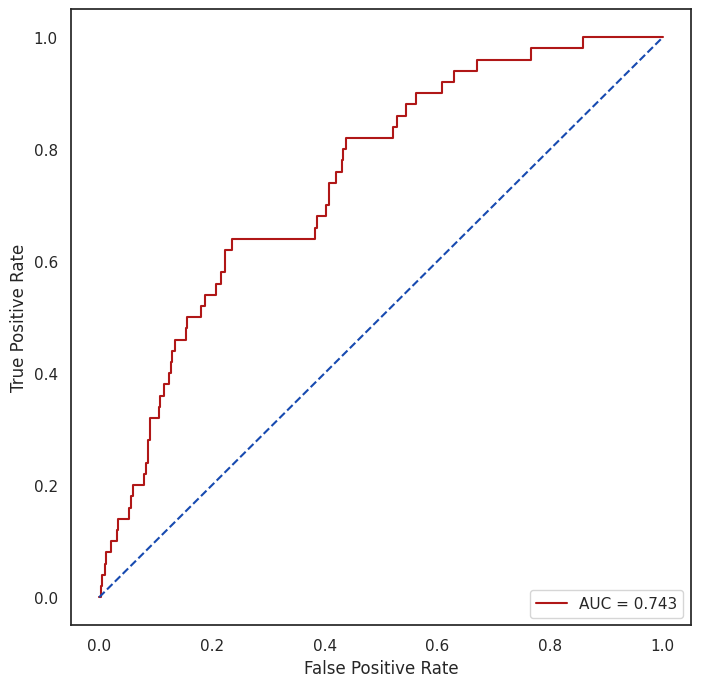

,feature,importance (abs coef)
3,heart_disease,1.634049
6,Residence_type,1.036739
2,hypertension,1.020637
4,ever_married,0.943821
0,gender,0.863029
5,work_type,0.387200
9,smoking_status,0.285953
1,age,0.093975
7,avg_glucose_level,0.007050
8,bmi,0.006175


In [61]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 42, max_iter = 1000)
lg.fit(x_train_resampled, y_train_resampled)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)
lg_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")

results.iloc[4, 2] = round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)


# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'RdPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(10))
for i in range(len(f_imp.index)):
    f_imp.iloc[i, 0] = x_train_resampled.columns.to_list()[i]
f_imp['importance (abs coef)'] = abs(lg.coef_)[0]
f_imp = f_imp.sort_values('importance (abs coef)', ascending = False)
f_imp[0:12].style.background_gradient(cmap = 'RdPu')

**XGBoost**

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.12      0.18      0.14        50

    accuracy                           0.90      1022
   macro avg       0.54      0.56      0.54      1022
weighted avg       0.92      0.90      0.91      1022

ROC AUC score: 0.759

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.989
precision: 0.94
recall: 0.95
f1: 0.94


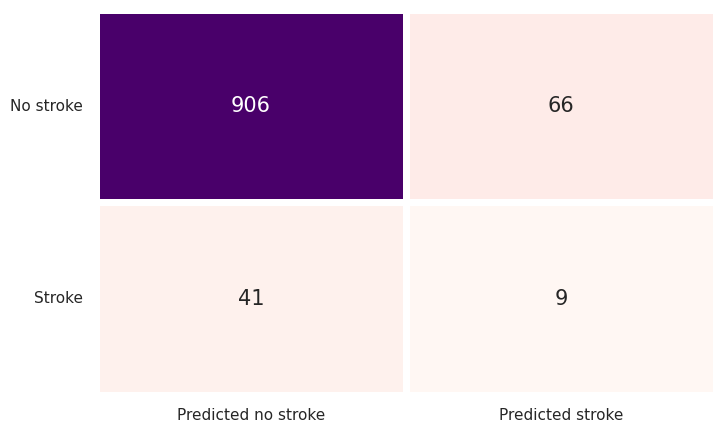

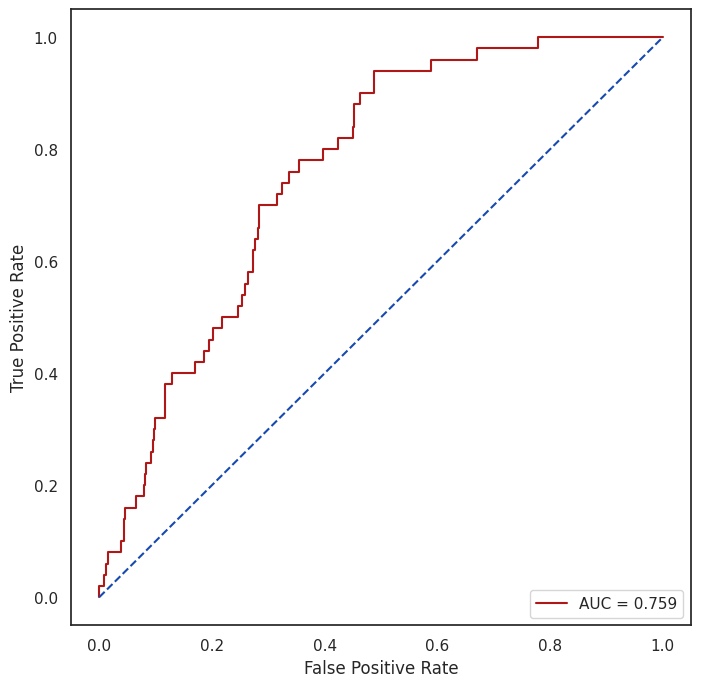

,feature,importance
0,gender,0.146482
1,age,0.144279
2,hypertension,0.127421
4,ever_married,0.122850
6,Residence_type,0.112476
3,heart_disease,0.102618
5,work_type,0.101271
7,avg_glucose_level,0.050006
8,bmi,0.047934
9,smoking_status,0.044663


In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(x_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 4] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 4] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 4] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 4] = round(roc_auc_score(y_test, y_prob), 3)
xgb_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")

results.iloc[4, 4] = round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'RdPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = x_train_resampled.columns.to_list()[i]
f_imp3['importance'] = xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'RdPu')

**LightGBM**

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.11      0.30      0.16        50

    accuracy                           0.84      1022
   macro avg       0.53      0.59      0.54      1022
weighted avg       0.92      0.84      0.88      1022

ROC AUC score: 0.751

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.973
precision: 0.89
recall: 0.95
f1: 0.91


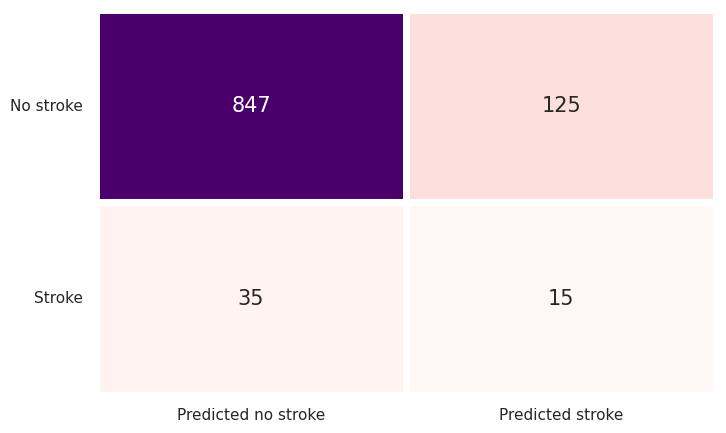

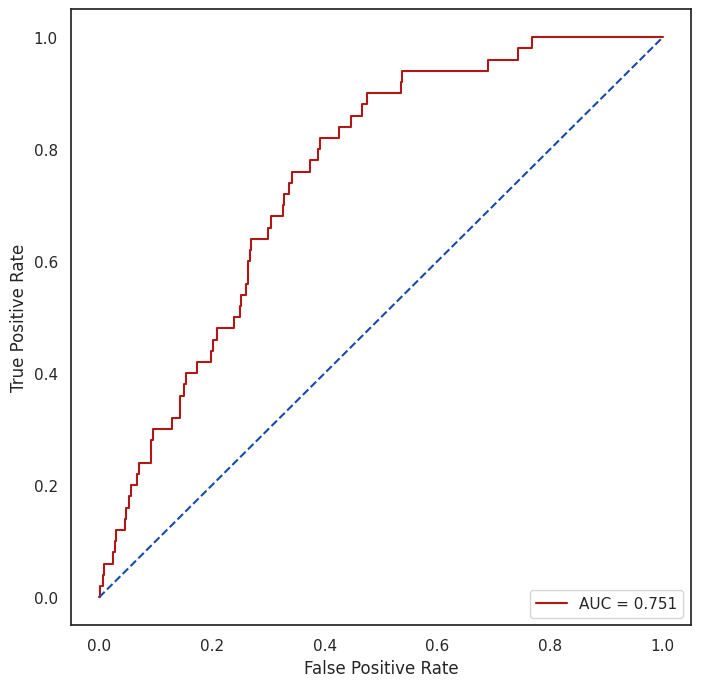

,feature,importance
1,age,712
7,avg_glucose_level,575
8,bmi,496
5,work_type,137
9,smoking_status,112
6,Residence_type,90
0,gender,71
4,ever_married,66
2,hypertension,35
3,heart_disease,30


In [63]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = 42, max_depth = 5, num_leaves = 50)
lgbm.fit(x_train_resampled, y_train_resampled)
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 5] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 5] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 5] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 5] = round(roc_auc_score(y_test, y_prob), 3)
lgbm_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")

results.iloc[4, 5] = round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)


# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lgbm_cm, cmap = 'RdPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp4 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp4.index)):
      f_imp4.iloc[i, 0] = x_train_resampled.columns.to_list()[i]
f_imp4['importance'] = lgbm.feature_importances_
f_imp4 = f_imp4.sort_values('importance', ascending = False)
f_imp4[0:12].style.background_gradient(cmap = 'RdPu')

**AdaBoost Classifier(AdaptiveBoosting)**

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       972
           1       0.12      0.28      0.17        50

    accuracy                           0.86      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.92      0.86      0.89      1022

ROC AUC score: 0.726

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.964
precision: 0.89
recall: 0.9
f1: 0.9


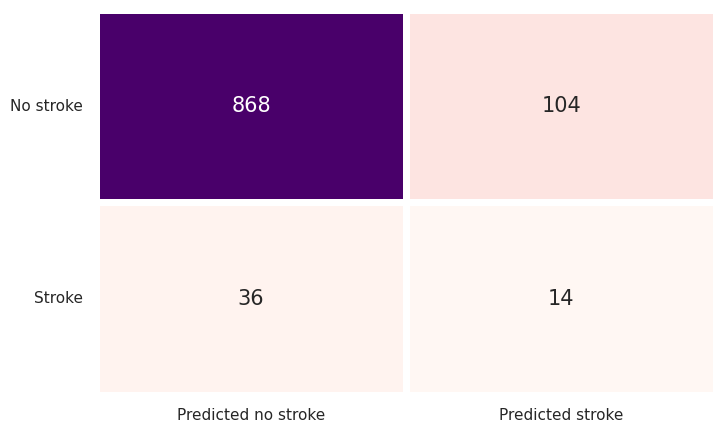

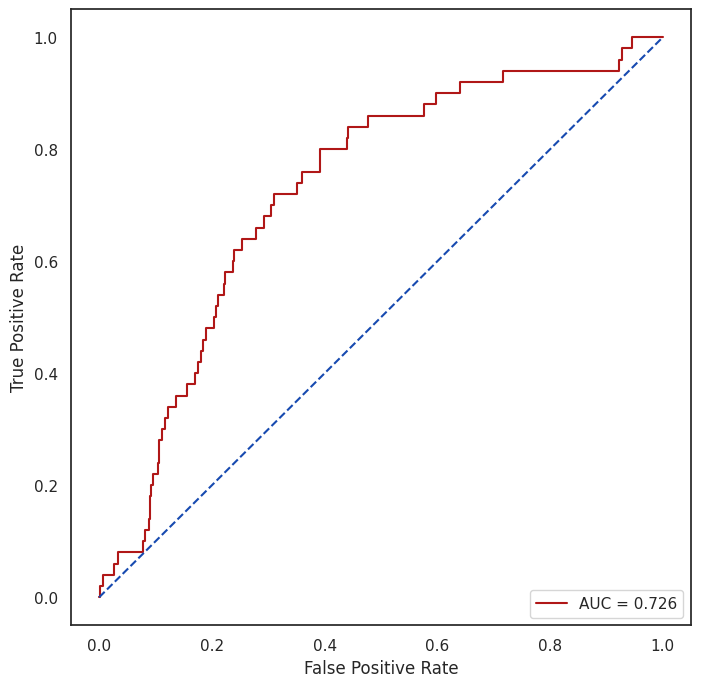

,feature,importance
1,age,0.777500
7,avg_glucose_level,0.100000
8,bmi,0.091000
5,work_type,0.023000
4,ever_married,0.002000
9,smoking_status,0.002000
3,heart_disease,0.001500
0,gender,0.001000
2,hypertension,0.001000
6,Residence_type,0.001000


In [64]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=2000, random_state = 42)
Ada.fit(x_train_resampled, y_train_resampled)
y_pred = Ada.predict(X_test)
y_prob = Ada.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 6] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 6] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 6] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 6] = round(roc_auc_score(y_test, y_prob), 3)
Ada_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")

results.iloc[4, 6] = round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(Ada_cm, cmap = 'RdPu', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp4 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp4.index)):
   f_imp4.iloc[i, 0] = x_train_resampled.columns.to_list()[i]
f_imp4['importance'] = Ada.feature_importances_
f_imp4 = f_imp4.sort_values('importance', ascending = False)
f_imp4[0:12].style.background_gradient(cmap = 'RdPu')

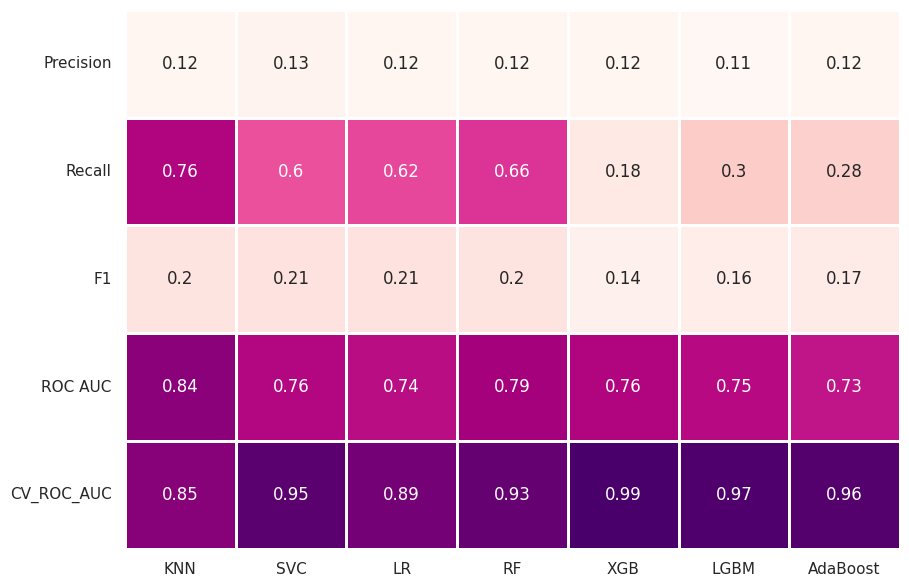

In [65]:
plt.figure(figsize = (10, 7))
sns.heatmap(results[results.columns.to_list()].astype(float), cmap = 'RdPu', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Precision', 'Recall', 'F1', 'ROC AUC','CV_ROC_AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

#Model Optimization


Optimizing KNN

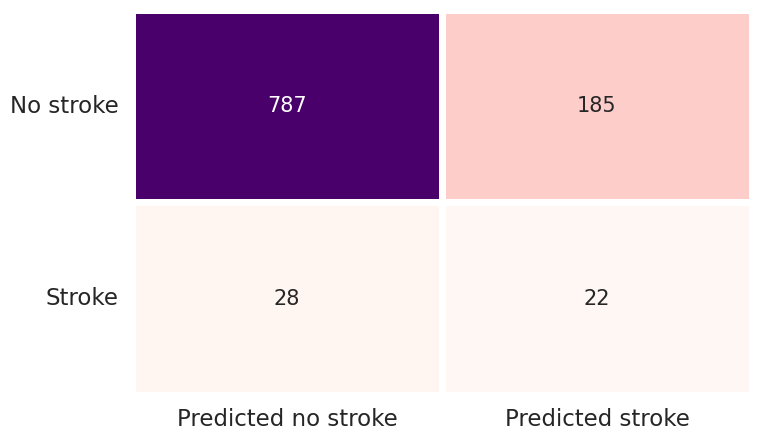

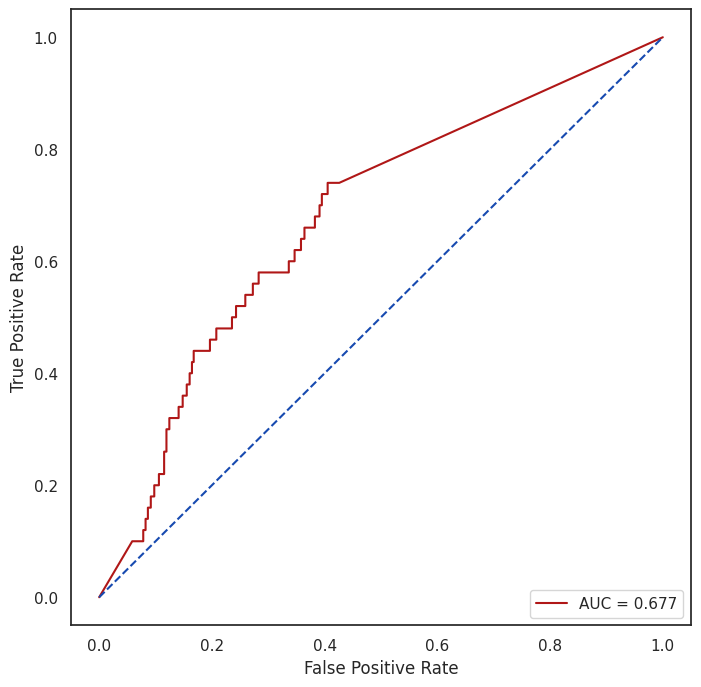

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       972
           1       0.11      0.44      0.17        50

    accuracy                           0.79      1022
   macro avg       0.54      0.62      0.53      1022
weighted avg       0.92      0.79      0.85      1022

ROC AUC score: 0.677
-----------------------------------------------------
Cross-validation scores with 5 folds:
ROC AUC: 0.955
Precision: 0.83
Recall: 0.97
F1: 0.89


In [66]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with preprocessing steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for grid search
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Perform grid search with stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics and store the results
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)

# Use cross_val_score with the best model
results.iloc[4, 1] = round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)

# Visualize confusion matrix
knn_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(knn_cm, cmap='RdPu', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Print classification report and cross-validation scores
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print(f"ROC AUC: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)}")


Optimizing SVC

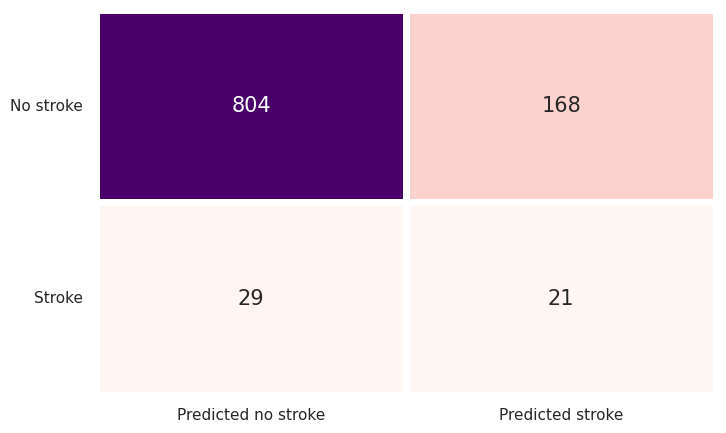

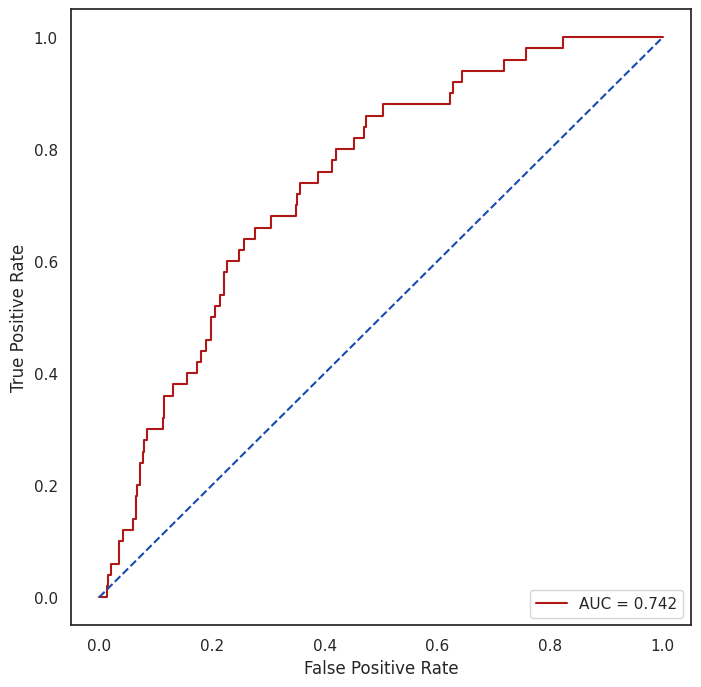

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.11      0.42      0.18        50

    accuracy                           0.81      1022
   macro avg       0.54      0.62      0.53      1022
weighted avg       0.92      0.81      0.86      1022

ROC AUC score: 0.742
-----------------------------------------------------
Cross-validation scores with 5 folds:
ROC AUC: 0.942
Precision: 0.85
Recall: 0.93
F1: 0.89


In [67]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the pipeline with preprocessing steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=22, probability=True))
])

# Define the parameter grid for grid search
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Perform grid search with stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics and store the results
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_prob), 3)

# Use cross_val_score with the best model
results.iloc[4, 0] = round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)

# Visualize confusion matrix
svc_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(svc_cm, cmap='RdPu', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Print classification report and cross-validation scores
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print(f"ROC AUC: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)}")


Optimizing Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

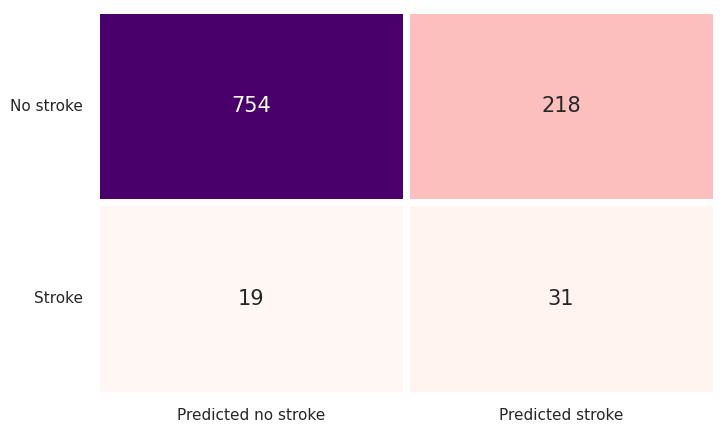

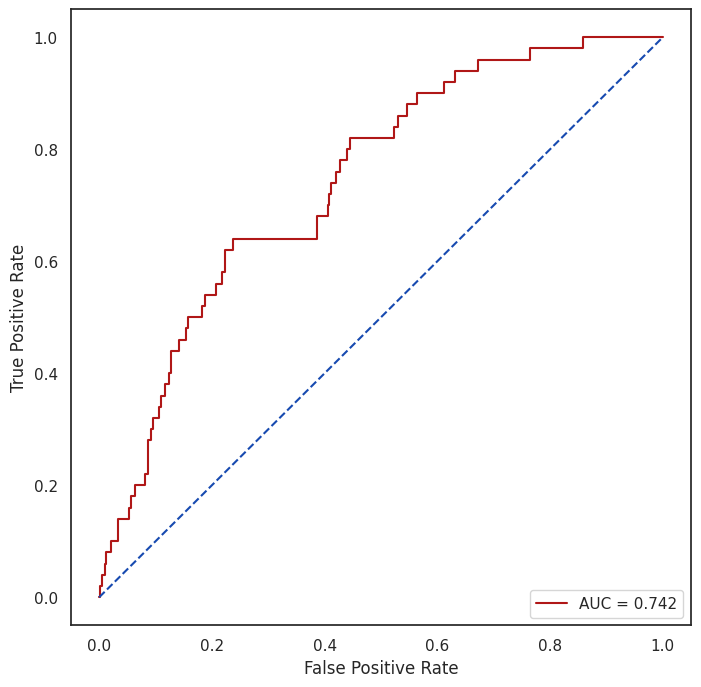

              precision    recall  f1-score   support

           0       0.98      0.78      0.86       972
           1       0.12      0.62      0.21        50

    accuracy                           0.77      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.77      0.83      1022

ROC AUC score: 0.742
-----------------------------------------------------
Cross-validation scores with 5 folds:
ROC AUC: 0.892
Precision: 0.8
Recall: 0.83
F1: 0.81


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the pipeline with preprocessing steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lg', LogisticRegression(random_state=42, max_iter=1000))
])

# Define the parameter grid for grid search
param_grid = {
    'lg__C': [0.1, 1, 10],
    'lg__penalty': ['l1', 'l2']
}

# Perform grid search with stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics and store the results
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)

# Use cross_val_score with the best model
results.iloc[4, 2] = round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)






# Visualize confusion matrix
lg_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(lg_cm, cmap='RdPu', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp = pd.DataFrame({'feature': x_train_resampled.columns, 'importance (abs coef)': np.abs(best_model.named_steps['lg'].coef_[0])})
f_imp = f_imp.sort_values('importance (abs coef)', ascending=False).head(12)
f_imp.style.background_gradient(cmap='RdPu')

# Print classification report and cross-validation scores
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print(f"ROC AUC: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)}")


Optimizing Random Forest

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.66      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.52      1022
weighted avg       0.94      0.74      0.82      1022

ROC AUC score: 0.789



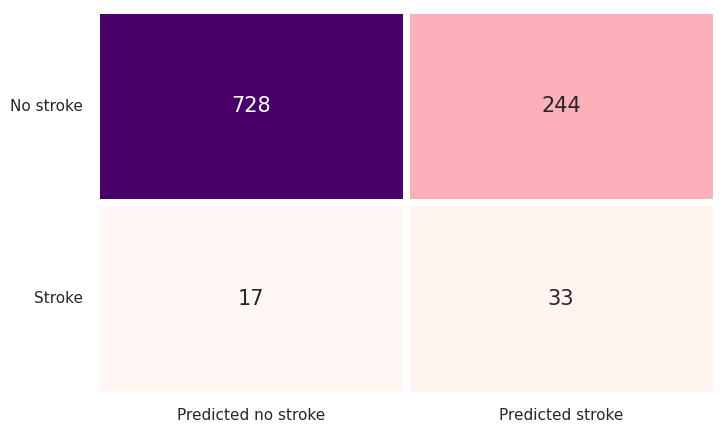

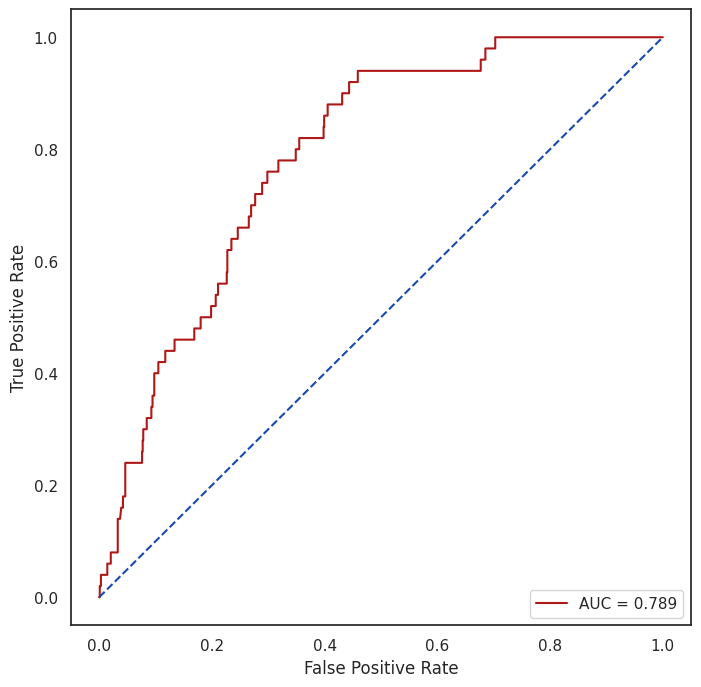

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.66      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.52      1022
weighted avg       0.94      0.74      0.82      1022

ROC AUC score: 0.789
-----------------------------------------------------
Cross-validation scores with 5 folds:
ROC AUC: 0.947
Precision: 0.83
Recall: 0.93
F1: 0.87


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_depth=5)

# Fit the model
rf.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate metrics
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
roc_auc = round(roc_auc_score(y_test, y_prob), 3)

# Store metrics in the results DataFrame
results.iloc[0, 3] = precision
results.iloc[1, 3] = recall
results.iloc[2, 3] = f1
results.iloc[3, 3] = roc_auc

# Print classification report and ROC AUC score
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc}\n')

# Calculate cross-validation scores
cv_roc_auc = round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)
cv_precision = round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)
cv_recall = round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)
cv_f1 = round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)

# Store cross-validation scores in the results DataFrame
results.iloc[4, 3] = cv_roc_auc

# Visualize confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(rf_cm, cmap='RdPu', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp2 = pd.DataFrame(columns=['feature', 'importance'], index=range(10))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = x_train_resampled.columns.to_list()[i]
f_imp2['importance'] = rf.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending=False)
f_imp2[0:12].style.background_gradient(cmap='RdPu')

# Print classification report and cross-validation scores
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print(f"ROC AUC: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)}")


Optimizing XGB

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.12      0.18      0.14        50

    accuracy                           0.90      1022
   macro avg       0.54      0.56      0.54      1022
weighted avg       0.92      0.90      0.91      1022

ROC AUC score: 0.759
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.989
Precision: 0.94
Recall: 0.95
F1: 0.94


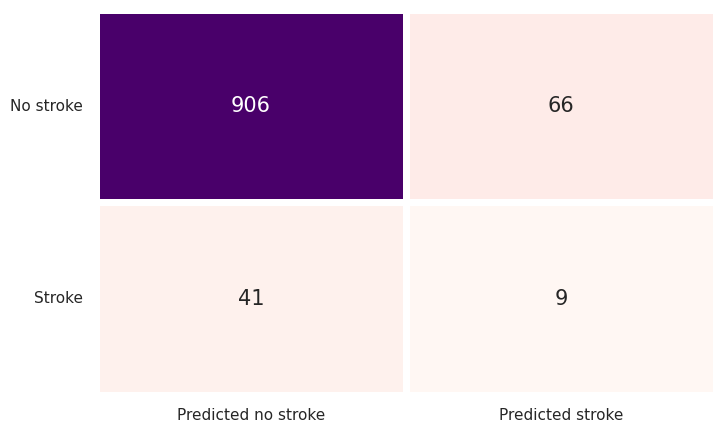

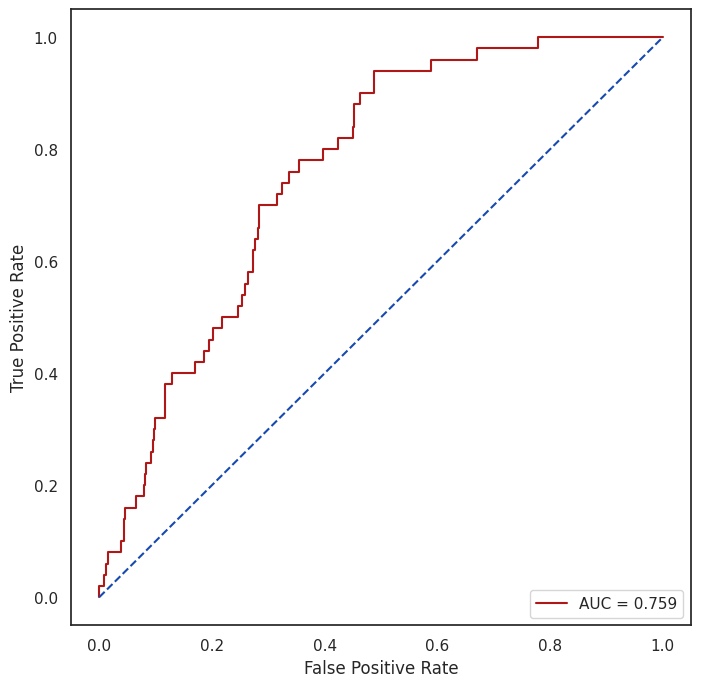

,feature,importance
0,gender,0.146482
1,age,0.144279
2,hypertension,0.127421
4,ever_married,0.122850
6,Residence_type,0.112476
3,heart_disease,0.102618
5,work_type,0.101271
7,avg_glucose_level,0.050006
8,bmi,0.047934
9,smoking_status,0.044663


In [75]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, max_depth=5, objective='binary:logistic', eval_metric='logloss')
xgb.fit(x_train_resampled, y_train_resampled)

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

results.iloc[0, 4] = round(precision, 2)
results.iloc[1, 4] = round(recall, 2)
results.iloc[2, 4] = round(f1, 2)
results.iloc[3, 4] = round(roc_auc, 3)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print(f'ROC AUC score: {round(roc_auc, 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)}")

results.iloc[4, 4] = round(cross_val_score(xgb, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)

# Visualize confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(xgb_cm, cmap='RdPu', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp3 = pd.DataFrame({'feature': x_train_resampled.columns, 'importance': xgb.feature_importances_})
f_imp3 = f_imp3.sort_values('importance', ascending=False).iloc[:12]
f_imp3.style.background_gradient(cmap='RdPu')


Optimizing LGBM

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.11      0.30      0.16        50

    accuracy                           0.84      1022
   macro avg       0.53      0.59      0.54      1022
weighted avg       0.92      0.84      0.88      1022

ROC AUC score: 0.751
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.973
Precision: 0.89
Recall: 0.95
F1: 0.91


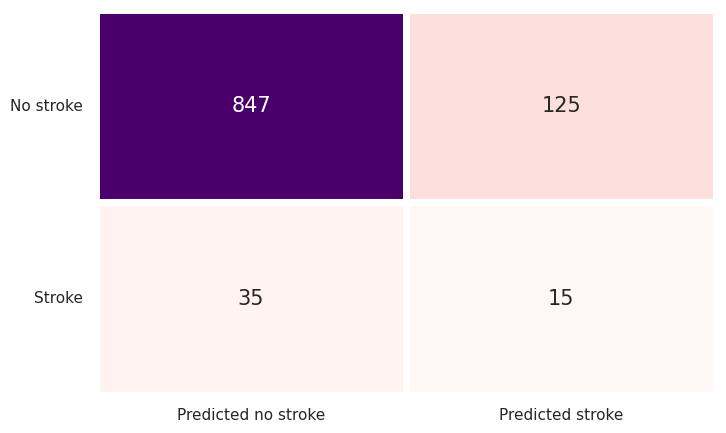

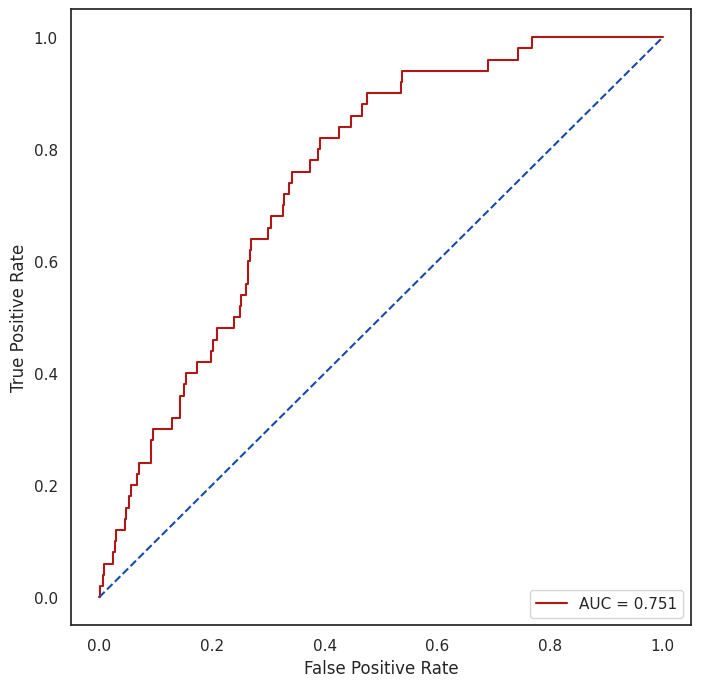

,feature,importance
1,age,712
7,avg_glucose_level,575
8,bmi,496
5,work_type,137
9,smoking_status,112
6,Residence_type,90
0,gender,71
4,ever_married,66
2,hypertension,35
3,heart_disease,30


In [76]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42, max_depth=5, num_leaves=50)
lgbm.fit(x_train_resampled, y_train_resampled)

y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

results.iloc[0, 5] = round(precision, 2)
results.iloc[1, 5] = round(recall, 2)
results.iloc[2, 5] = round(f1, 2)
results.iloc[3, 5] = round(roc_auc, 3)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print(f'ROC AUC score: {round(roc_auc, 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)}")

results.iloc[4, 5] = round(cross_val_score(lgbm, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)

# Visualize confusion matrix
lgbm_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(lgbm_cm, cmap='RdPu', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp4 = pd.DataFrame({'feature': x_train_resampled.columns, 'importance': lgbm.feature_importances_})
f_imp4 = f_imp4.sort_values('importance', ascending=False).iloc[:12]
f_imp4.style.background_gradient(cmap='RdPu')


Optimizing AdaBoost

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       972
           1       0.12      0.28      0.17        50

    accuracy                           0.86      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.92      0.86      0.89      1022

ROC AUC score: 0.726
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.964
Precision: 0.89
Recall: 0.9
F1: 0.9


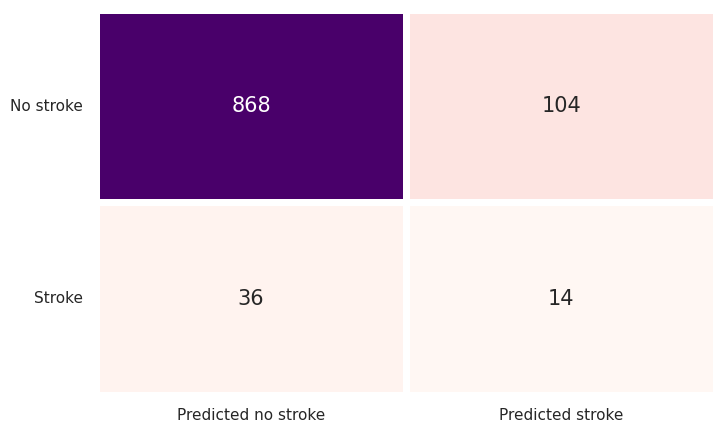

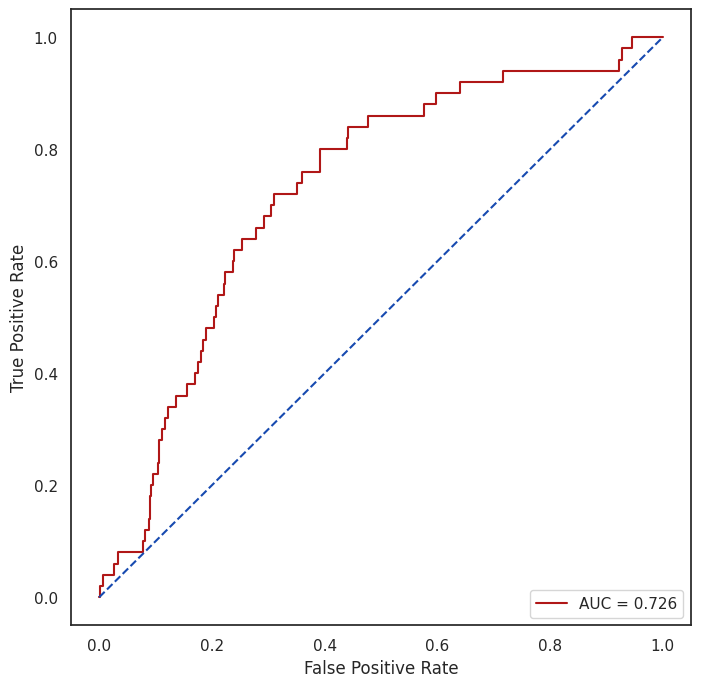

,feature,importance
1,age,0.777500
7,avg_glucose_level,0.100000
8,bmi,0.091000
5,work_type,0.023000
4,ever_married,0.002000
9,smoking_status,0.002000
3,heart_disease,0.001500
0,gender,0.001000
2,hypertension,0.001000
6,Residence_type,0.001000


In [77]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier(n_estimators=2000, random_state=42)
Ada.fit(x_train_resampled, y_train_resampled)

y_pred = Ada.predict(X_test)
y_prob = Ada.predict_proba(X_test)[:, 1]

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

results.iloc[0, 6] = round(precision, 2)
results.iloc[1, 6] = round(recall, 2)
results.iloc[2, 6] = round(f1, 2)
results.iloc[3, 6] = round(roc_auc, 3)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print(f'ROC AUC score: {round(roc_auc, 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv=5, scoring='f1').mean(), 2)}")

results.iloc[4, 6] = round(cross_val_score(Ada, x_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean(), 3)

# Visualize confusion matrix
Ada_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(Ada_cm, cmap='RdPu', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No stroke', 'Stroke'], xticklabels=['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation=0)
plt.show()

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp4 = pd.DataFrame({'feature': x_train_resampled.columns, 'importance': Ada.feature_importances_})
f_imp4 = f_imp4.sort_values('importance', ascending=False).iloc[:12]
f_imp4.style.background_gradient(cmap='RdPu')
